In [1]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import offsetbox

from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter

import seaborn as sns
import pandas as pd
import scipy.io

import metric_learn
from metric_learn import MMC_Supervised, MMC, NCA, LMNN

import sklearn
from sklearn import decomposition, manifold, cluster, datasets
from sklearn.decomposition import PCA
from sklearn.manifold import Isomap, MDS
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs, load_digits, make_moons, fetch_olivetti_faces

from time import time

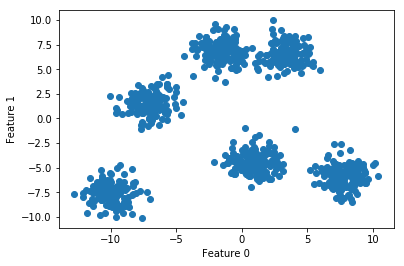

In [2]:
# Part 1: Clustering
# The purpose of this exercise is to apply basic clustering algorithms covered in class

# generate some random cluster data
X, y = make_blobs(random_state=100, n_samples=900, centers = 6)
rng = np.random.RandomState(74)
# visualization of the data
plt.scatter(X[:, 0], X[:, 1])
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

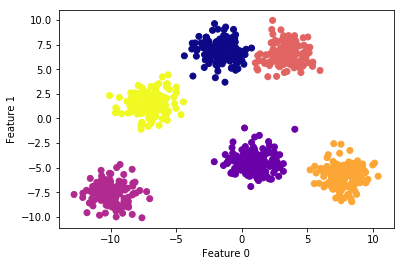

In [5]:
# Part 1: Clustering (cont)

# Let's see if common clustering algorithms could work in this case

# KMEANS- Clustering
### YOUR CODE HERE (Fill in the 'None'). 2 lines of code. 2 points
# Hint: make sure that variable "labels" is the array of cluster indices of samples in X
kmeans = KMeans(n_clusters=6, init="random", max_iter=50)
labels = kmeans.fit_predict(X)
### END OF YOUR CODE

# Visualization of the clustered data, result of KMeans
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap="plasma")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

Text(0, 0.5, 'Feature 1')

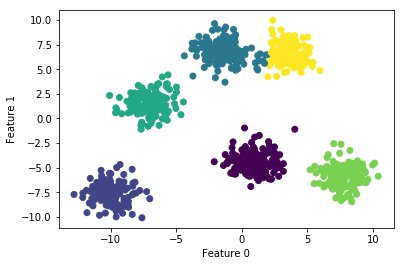

In [8]:
# Part 1: Clustering (cont)

# Agglomerative Clustering
### YOUR CODE HERE (Fill in the "None"). 2 lines of code. 2 points
# Hint: make sure that variable "y_pred" is the array of cluster indices of samples in X
# Hint: we use euclidean affinity, average linkage
agglomerative = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='average')
y_pred = agglomerative.fit_predict(X)

# Hint: define an Agglomerative Clustering object

### END OF YOUR CODE.

# Visualization of the clustered data, result of Agglomerative Clustering
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap="viridis")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to C:\Users\PC\scikit_learn_data


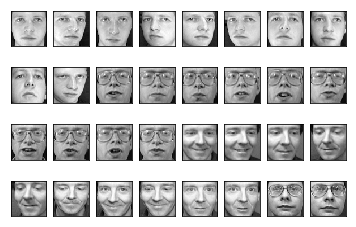

In [9]:
# Part 2: Dimensionality Reduction
# In the class on 07-05, we saw that Isomap could learn the 2 features of image data
# The purpose of this exercise is to examine Isomap on another dataset

# Load the face images (it may take several images)
faces = fetch_olivetti_faces()

# Visualization of some sample images from this dataset
fig, ax = plt.subplots(4, 8, subplot_kw=dict(xticks=[], yticks=[]))
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='gray')


In [10]:
#print(faces.data.shape)

(400, 4096)


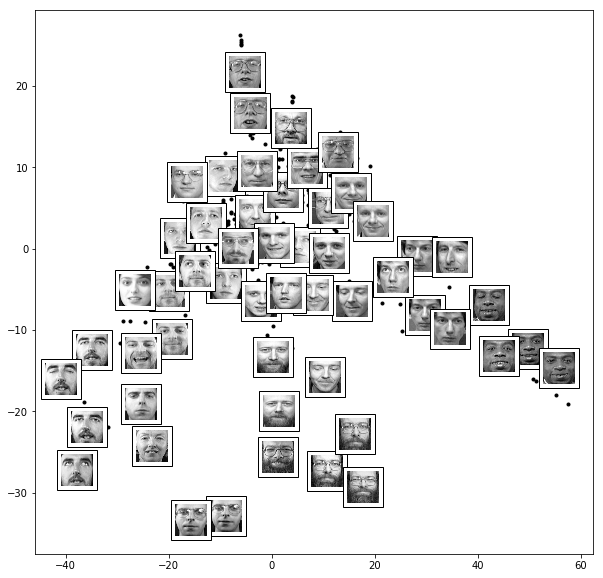

In [15]:
# Part 2: Dimensionality Reduction (cont)

# Load the face images
X = faces.data

# Isomap for X 
### YOUR CODE HERE (Fill in the "None"). 2 lines of code. 2 points.
# Hint: repeat the process in the 07-05 class, in which we can map the images to a 2-feature space
# Hint: the "proj" variable must be the transformed data
model = Isomap(n_components=2)
proj = model.fit_transform(X)
### END OF YOUR CODE

# Plot the embedded images
fig, ax = plt.subplots(figsize=(10, 10))
images = faces.images[:,::2,::2]
thumb_frac = 0.05
cmap = 'gray'
ax = ax or plt.gca()
    
ax.plot(proj[:, 0], proj[:, 1], '.k')

if images is not None:
    min_dist_2 = (thumb_frac * max(proj.max(0) - proj.min(0))) ** 2
    shown_images = np.array([2 * proj.max(0)])
    for i in range(X.shape[0]):
        dist = np.sum((proj[i] - shown_images) ** 2, 1)
        if np.min(dist) < min_dist_2:
            # don't show points that are too close
            continue
        shown_images = np.vstack([shown_images, proj[i]])
        imagebox = offsetbox.AnnotationBbox(
            offsetbox.OffsetImage(images[i], cmap=cmap),
                                      proj[i])
        ax.add_artist(imagebox)

In [39]:
# Part 2: Dimensionality Reduction (cont)

# Question: based on this mapping, what can we see about the features learned by Isomap? (1 point)
# Please pay attention to how images change along the HORIZONTAL axis

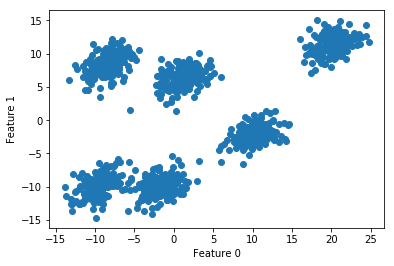

In [16]:
# Part 3: Metric Learning
# The purpose of this exercise is to see effects of Metric learning on data

# generate some random cluster data
X, y = make_blobs(random_state=100, n_samples=1000, centers = 6)
rng = np.random.RandomState(50)
# transform the data to be stretched
transformation = rng.normal(size=(2, 2))
X = np.dot(X, transformation)
# visualization of the data
plt.scatter(X[:, 0], X[:, 1])
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

C:\Users\PC\Anaconda3\lib\site-packages\metric_learn\lmnn.py:62: UserWarning: use_pca does nothing for the python_LMNN implementation
  warnings.warn('use_pca does nothing for the python_LMNN implementation')


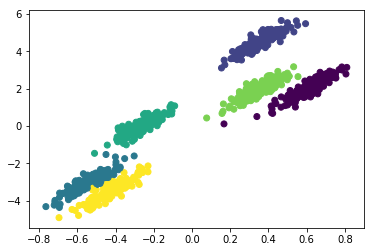

In [18]:
# Part 3: Metric Learning (cont)

# Agglomerative Clustering
### YOUR CODE HERE. Fill in the ("None"). 2 lines of code. 2 points.
# Hint: make sure that variable "y_pred" is the array of cluster indices of samples in X
# Hint: we use euclidean affinity, average linkage

agglomerative = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='average')
y_pred = agglomerative.fit_predict(X)

### END OF YOUR CODE

# LMNN metric learning
### YOUR CODE HERE (Fill in the "None"). 3 lines of code. 2 points
# Hint: define our LMNN object, use learning rate "1e-5", maximum 100 iterations
lmnn = LMNN(k=6, learn_rate=1e-5, max_iter=100)

# Hint: fit the LMNN object with data, AND use labels learned by Agglomerative Clustering learned above
lmnn.fit(X,y_pred)
# Hint: perform transformation on the data. 
X_transformed = lmnn.transform(X)
### END OF YOUR CODE

# Visualize the effects of LMNN on the transformed data
plt.scatter(X_transformed[:, 0], X_transformed[:, 1], c = y_pred)
plt.show()

In [ ]:
# Inquiries: manh.it97@kaist.ac.kr (MANH TUAN DO)
# Good luck! 